https://www.kaggle.com/c/choose-tutors/leaderboard#score  <br>
nikname kaggle: Alex Green

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer

import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

In [2]:
import matplotlib.pyplot as plt

In [3]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

In [4]:
train.head()

,Id,age,years_of_experience,lesson_price,qualification,physics,chemistry,biology,english,geography,history,mean_exam_points,choose
0,0,35.0,0.0,2150.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,74.0,0
1,1,52.0,2.0,1250.0,2.0,1.0,0.0,1.0,0.0,0.0,1.0,57.0,1
2,2,29.0,3.0,1750.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,66.0,0
3,3,33.0,3.0,1050.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,66.0,1
4,4,46.0,3.0,2250.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,73.0,0


In [5]:
train.describe()

,Id,age,years_of_experience,lesson_price,qualification,physics,chemistry,biology,english,geography,history,mean_exam_points,choose
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,4999.50000,45.800900,1.974800,1702.440000,1.724300,0.37060,0.121500,0.117200,0.059100,0.02770,0.018000,64.435200,0.110900
std,2886.89568,8.030274,1.766883,523.789062,0.798845,0.48299,0.326724,0.321675,0.235824,0.16412,0.132958,13.595024,0.314024
min,0.00000,23.000000,0.000000,200.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,33.000000,0.000000
25%,2499.75000,40.000000,0.000000,1300.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,55.000000,0.000000
50%,4999.50000,46.000000,2.000000,1550.000000,2.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,63.000000,0.000000
75%,7499.25000,51.000000,3.000000,2150.000000,2.000000,1.00000,0.000000,0.000000,0.000000,0.00000,0.000000,74.000000,0.000000
max,9999.00000,68.000000,9.000000,3950.000000,4.000000,1.00000,1.000000,1.000000,1.000000,1.00000,1.000000,100.000000,1.000000


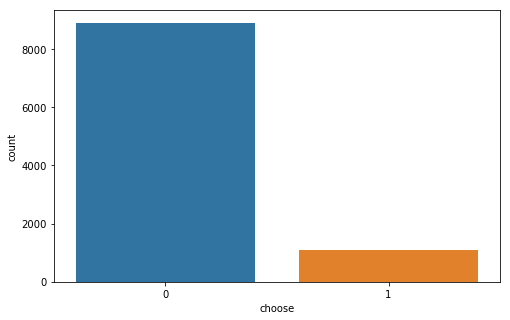

In [6]:
# Обзор распределения целевой переменной
plt.figure(figsize=(8, 5))

sns.countplot(x='choose', data=train)

In [7]:
# переведем признак "qualification" в бинарный

qualification = train['qualification']
encod_qualific = LabelBinarizer()
qual_bins = encod_qualific.fit_transform(qualification)
tmp = pd.DataFrame(qual_bins)
tmp_col = ['qualification_'+str(i) for i in tmp.columns]
tmp.columns = tmp_col
train = pd.concat([train, tmp], axis=1)
train.drop(columns=['qualification'], inplace=True, axis=1)

tmp_test = pd.DataFrame(encod_qualific.transform(test['qualification']), columns=tmp_col)
test = pd.concat([test, tmp_test], axis=1)
test.drop(columns=['qualification'], inplace=True, axis=1)

In [8]:
x_train_norm = train.copy().drop(columns=['Id', 'choose'])
y_train_norm = train['choose'].copy()

x_test_norm = test.copy().drop(columns=['Id'])

In [9]:
norm_max = x_train_norm.max()
norm_min = x_train_norm.min()

In [10]:
x_train_norm = np.array(x_train_norm)
y_train_norm = np.array(y_train_norm)
x_test_norm = np.array(x_test_norm)

In [11]:
for i in range(x_train_norm.shape[1]):
    x_train_norm.T[i] = (x_train_norm.T[i] - norm_min[i]) / (norm_max[i] - norm_min[i])

In [12]:
for i in range(x_test_norm.shape[1]):
    x_test_norm.T[i] = (x_test_norm.T[i] - norm_min[i]) / (norm_max[i] - norm_min[i])

Далее разделим выборку на обучающую и тестовую. 

In [13]:
# перемешивание датасета
np.random.seed(12)
shuffle_index = np.random.permutation(x_train_norm.shape[0])
X_shuffled, y_shuffled = x_train_norm[shuffle_index], y_train_norm[shuffle_index]

# разбивка на обучающую и тестовую выборки
train_proportion = 0.75
train_test_cut = int(len(x_train_norm) * train_proportion)

X_train, X_test, y_train, y_test = \
    X_shuffled[:train_test_cut], \
    X_shuffled[train_test_cut:], \
    y_shuffled[:train_test_cut], \
    y_shuffled[train_test_cut:]
    
print("Размер массива признаков обучающей выборки", X_train.shape)
print("Размер массива признаков тестовой выборки", X_test.shape)
print("Размер массива ответов для обучающей выборки", y_train.shape)
print("Размер массива ответов для тестовой выборки", y_test.shape)

Размер массива признаков обучающей выборки (7500, 14)
Размер массива признаков тестовой выборки (2500, 14)
Размер массива ответов для обучающей выборки (7500,)
Размер массива ответов для тестовой выборки (2500,)


Далее транспонируем матрицы данных, так как нам удобнее работать со строками

In [14]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [15]:
X_train_tr = X_train.transpose()
y_train_tr = y_train.reshape(1, y_train.shape[0])
X_test_tr = X_test.transpose()
y_test_tr = y_test.reshape(1, y_test.shape[0])

In [16]:
def log_loss(w, X, y):
    m = X.shape[1]

    # используем функцию сигмоиды, написанную ранее
    A = sigmoid(np.dot(w.T, X))
    
    loss = -1.0 / m * np.sum(y * np.log(A) + (1 - y) * np.log(1 - A))
    loss = np.squeeze(loss)
    grad = 1.0 / m * np.dot(X, (A - y).T)
    
    return loss, grad

Реализуем градиентный спуск

In [17]:
def optimize(w, X, y, n_iterations, eta):
#     потери будем записывать в список для отображения в виде графика
    losses = []
    
    for i in range(n_iterations):        
        loss, grad = log_loss(w, X, y)
        w = w - eta * grad

        losses.append(loss)
        
    return w, losses

и функцию для выполнения предсказаний

In [18]:
def predict(w, X, q0=1):

    m = X.shape[1]
    
    y_predicted = np.zeros((1, m))
    w = w.reshape(X.shape[0], 1)
    
    A = sigmoid(np.dot(w.T, X))
    
#     За порог отнесения к тому или иному классу примем вероятность 0.5
    for i in range(A.shape[1]):
        if (A[:,i] > q0): 
            y_predicted[:, i] = 1
        elif (A[:,i] <= q0):
            y_predicted[:, i] = 0
    
    return y_predicted

In [19]:
#     Введем коэф для борьбы с несбалансированной выборкой
q0 = Counter(y_train)[1]/Counter(y_train)[0] 

In [20]:
# иницилизируем начальный вектор весов
w0 = np.zeros((X_train_tr.shape[0], 1))

# q0 = 1
n_iterations = 15000
eta = 0.11

w, losses = optimize(w0, X_train_tr, y_train_tr, n_iterations, eta)

y_predicted_test = predict(w, X_test_tr, q0)
y_predicted_train = predict(w, X_train_tr, q0)

# В качестве меры точности возьмем долю правильных ответов
train_accuracy = 100.0 - np.mean(np.abs(y_predicted_train - y_train_tr)*100.0)
test_accuracy = 100.0 - np.mean(np.abs(y_predicted_test-y_test_tr)*100.0)

print(f"Итоговый вектор весов w: {w}")
print(f"Точность на обучающей выборке: {train_accuracy:.3f}")
print(f"Точность на тестовой выборке: {test_accuracy:.3f}")

Итоговый вектор весов w: [[ 0.18868899]
 [ 0.54506691]
 [-8.63037342]
 [ 1.15028721]
 [ 0.68459354]
 [ 0.7092129 ]
 [ 0.21773131]
 [ 0.18355328]
 [-0.08811169]
 [ 2.92674323]
 [-1.71328535]
 [-1.11228914]
 [-0.21123787]
 [ 0.17677062]]
Точность на обучающей выборке: 74.200
Точность на тестовой выборке: 74.800


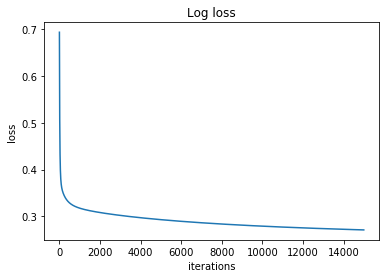

In [21]:
plt.title('Log loss')
plt.xlabel('iterations')
plt.ylabel('loss')
plt.plot(range(len(losses)), losses)

In [22]:
y_pred = predict(w, x_test_norm.T, q0)

In [23]:
submission = pd.DataFrame(test['Id'], columns=['Id'])
submission['choose'] = y_pred[0]

In [24]:
submission.to_csv('out/pred_choose_exams_14.csv', index=False)